# Primer Punto - Teoría de juegos y cooperación

El juego de snowdrift se diferencia del dilema del prisionero en que el primero la mejor estrategia es hacer lo opuesto a la estrategia del oponente, i.e. si el oponente colabora, yo no, y viceverza. Mientras tanto en el dilema del prisionero siempre hay incentivo para no colaborar, i.e. independientemente de la estrategia del otro, siempre es mejor para mi no colaborar.

Dado que la levadura siempre se puede quedar con una pequeña parte del azúcar que procesa, su estrategia prospera y hay un equilibrio entre las dos poblaciones. Si se redujera la eficiencia de captura del azúcar producida, las cooperadoras no tendrían esa pequeña ventaja y las no-cooperadoras siempre tendrían las de ganar, llevando a las primeras a la extinción. Otra forma alternativa sería elevar el costo de la cooperación, lo que hace que, a pesar de tener una ventaja (quedarse con un poco del azúcar), cooperar sea inviable por el costo metabólico asociado, de nuevo haciendo más atractiva la estrategia no cooperativa. Para elevar el costo de la cooperación se puede disminuir la concentración de histidina.

Finalmente, la manera más sencilla de transformar el juego es aumentar la concentración de glucosa, de esa manera las no-cooperadoras no dependen de las cooperadoras y su estrategia resultará siempre en tener un fitness mayor, llevando a las segundas a la extinción. Al aumentar la glucosa en el medio es posible que se disminuya la tasa de crecimiento promedio (hay menos azúcar disponible en total), pero siempre terminan ganando las no cooperadoras.

# Segundo punto - Modelo de Moran

Si suponemos mutaciones perjudiciales con fitness de 4/6 y individuos no-mutados con fitness 6/6, el fitness total de la población sería F_t=4/6+(N-1), y con esto puedo calcular las probabilidades de que se reproduzcan los *wild type* o los mutados.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
t=[]
N=3
for j in range(100):
    poblaciones=zeros((10,2))  #10 poblaciones con 2 estados posibles
    poblaciones[:,0],poblaciones[:,1]=N-1,1
    F_t=poblaciones[:,0]+(4./6.)*poblaciones[:,1]
    generaciones=0
    while(size(where(poblaciones[:,1]>0))>5):
        F_t=poblaciones[:,0]+(4./6.)*poblaciones[:,1]
        #Nacimiento
        nace=[]
        for i in range(size(F_t)):
            if(F_t[i]*random.random()<poblaciones[i,0]):
                nace.append(0)
            else:
                nace.append(1)
        #Muere
        muere=[]
        for i in range(size(F_t)):
            if(N*random.random()<poblaciones[i,0]):
                muere.append(0)
            else:
                muere.append(1)
        #Actualice
        for i in range(size(F_t)):
            poblaciones[i,nace[i]]=poblaciones[i,nace[i]]+1
            poblaciones[i,muere[i]]=poblaciones[i,muere[i]]-1
        #print generaciones
        #print poblaciones
        generaciones=generaciones+1  
    t.append(generaciones)

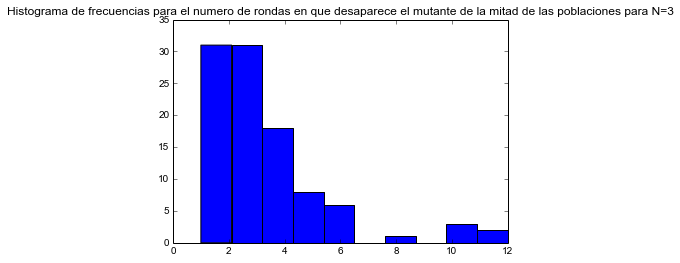

In [21]:
hist(t)
title("Histograma de frecuencias para el numero de rondas en que desaparece el mutante de la mitad de las poblaciones para N=3")

In [13]:
print "El tiempo promedio para que desaparezcan los individuos mutantes de la mitad de las poblaciones si cada poblacion tiene tres individuos es ",average(t),"rondas"

El tiempo promedio para que desaparezcan los individuos mutantes de la mitad de las poblaciones si cada poblacion tiene tres individuos es  3.6 rondas


In [15]:
t2=[]
N=6
for j in range(100):
    poblaciones=zeros((10,2))  #10 poblaciones con 2 estados posibles
    poblaciones[:,0],poblaciones[:,1]=N-1,1
    F_t=poblaciones[:,0]+(4./6.)*poblaciones[:,1]
    generaciones=0
    while(size(where(poblaciones[:,1]>0))>5):
        F_t=poblaciones[:,0]+(4./6.)*poblaciones[:,1]
        #Nacimiento
        nace=[]
        for i in range(size(F_t)):
            if(F_t[i]*random.random()<poblaciones[i,0]):
                nace.append(0)
            else:
                nace.append(1)
        #Muere
        muere=[]
        for i in range(size(F_t)):
            if(N*random.random()<poblaciones[i,0]):
                muere.append(0)
            else:
                muere.append(1)
        #Actualice
        for i in range(size(F_t)):
            poblaciones[i,nace[i]]=poblaciones[i,nace[i]]+1
            poblaciones[i,muere[i]]=poblaciones[i,muere[i]]-1
        #print generaciones
        #print poblaciones
        generaciones=generaciones+1  
    t2.append(generaciones)

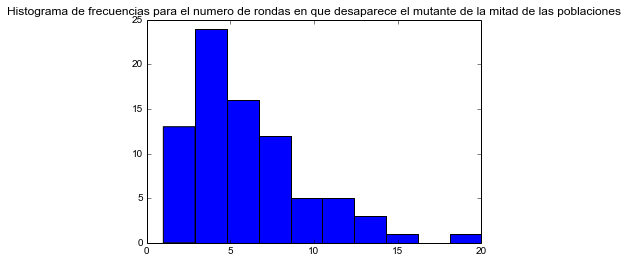

In [20]:
hist(t2)
title("Histograma de frecuencias para el numero de rondas en que desaparece el mutante de la mitad de las poblaciones")

In [23]:
print "El tiempo promedio para que desaparezcan los individuos mutantes de la mitad de las poblaciones si cada poblacion tiene tres individuos es ",average(t2),"rondas"

El tiempo promedio para que desaparezcan los individuos mutantes de la mitad de las poblaciones si cada poblacion tiene tres individuos es  5.75 rondas


# Tercer punto - Evolución de la cooperación

## Kin selection

Este comportamiento es benéfico para el gen que lo cause pues, asumiendo un modelo básico de Mendel para la transmisión, si yo me sacrifico por dos hermanos entonces de todas formas sobrevivirán dos copias del gen, perdiendo una (la mía). De igual forma, al sacrificarse por cuatro primos, estadísticamente, sobrevivirían al menos dos copias

## Greenbeard

Esto produce un beneficio porque entre los de barba verde nos ayudamos y así se incrementa nuestro fitness. Yo puedo saber a quién ayudar y de quién esperar ayuda, los otros saben que pueden ayudarme y esperar un comportamiento recíproco de mi parte.

Por otro lado, otro gen podría provecharse de esta estrategia si puede ver la señal y fingirla, aprovechándose del beneficio sin ningún costo de aportar a los demás.

## Selección de grupo

Es difícil que un comportamiento de este tipo surja a menos que alcance una cierta "masa crítica", i.e. un cierto número mínimo de organismos cooperantes, esto es porque los no cooperantes en el grupo se aprovecharían de los cooperantes, aumentando su fitness e imponiéndose en la población.

Sin embargo este comportamiento puede ser beneficioso porque entre todos los los individuos del grupo cooperante se pueden dividir el costo equitativamente (asumiendo que la colaboración es aleatoria y un juego largo de varias rondas), mientras todos disfrutan del beneficio en general.

# Cuarto punto - Redes

## a. 
### Grado de entrada y salida

| Nodo  | Grado de entrada  |  Grado de salida |  
|---|---|---|
| A  |2   |2   |
|  B | 0  | 3  |
|   C|  1 |  2 |
|D   |   3|   1|
|E   | 3  |2   |
| F  |  2 | 1  |

### Camino más corto entre cada par de nodos

Para esta parte se contará el número de vértices que hay que usar para llegar del nodo inicio al nodo destino. Si el número de vértices es cero significa que ese camino no es posible, si es uno que la ruta es directa, i.e. que los nodos inicio y destino están conectados por un vértice en esa dirección. Si se requere de más de un vértice se indica la ruta o rutas más cortas a continuación.

|Nodo origen y destino|Número de vértices|Rutas|
|---|---|---|
|AB      |0      |      |
|AC      | 0     |      |
|AD      |  2    |AFD      |
|AE      |   1   |      |
|AF      |    1  |      |
|BA      |1      |      |
|  BC    | 1     |      |
|    BD  |  1    |      |
|BE      |   2   |BAE / BDE / BCE      |
|  BF    |    2  |BAF      |